## The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.



In [1]:
import warnings
warnings.filterwarnings('ignore')

# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [10]:
df = pd.read_csv("cars-dataset.csv",na_values='?')  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [12]:
df.columns[df.isna().any() == True]

Index(['hp'], dtype='object')

In [18]:
# This tells you the percentage of null values in each column
round(100 *(df.isnull().sum(axis=0)/df.shape[0]),2)

car name    0.00
cyl         0.00
disp        0.00
hp          1.51
wt          0.00
acc         0.00
yr          0.00
mpg         0.00
dtype: float64

### Observation
> There are missing values in column hp

#### Since the percentage of data in hp column is less (1.51%). We can ignore the records by dropping them

In [19]:
df_dropped_na = df.dropna()
df_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


### Observation
> 6 entries have been removed from the df

# 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [39]:
df_dropped_na.corr()[abs(df_dropped_na.corr())< 0.25]

,cyl,disp,hp,wt,acc,yr,mpg
cyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation
> There are no columns that are poorly correlated with any attribute

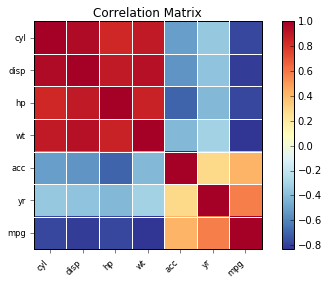

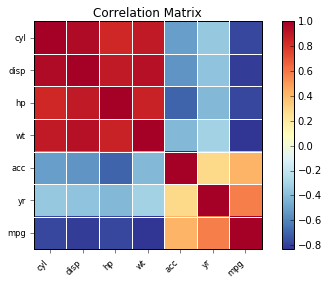

In [20]:
import statsmodels.graphics.api as smg
smg.plot_corr(df_dropped_na.corr(),xnames=list(df_dropped_na.corr().columns))

### Observation
> There are columns that are highly correlated with some other attribute

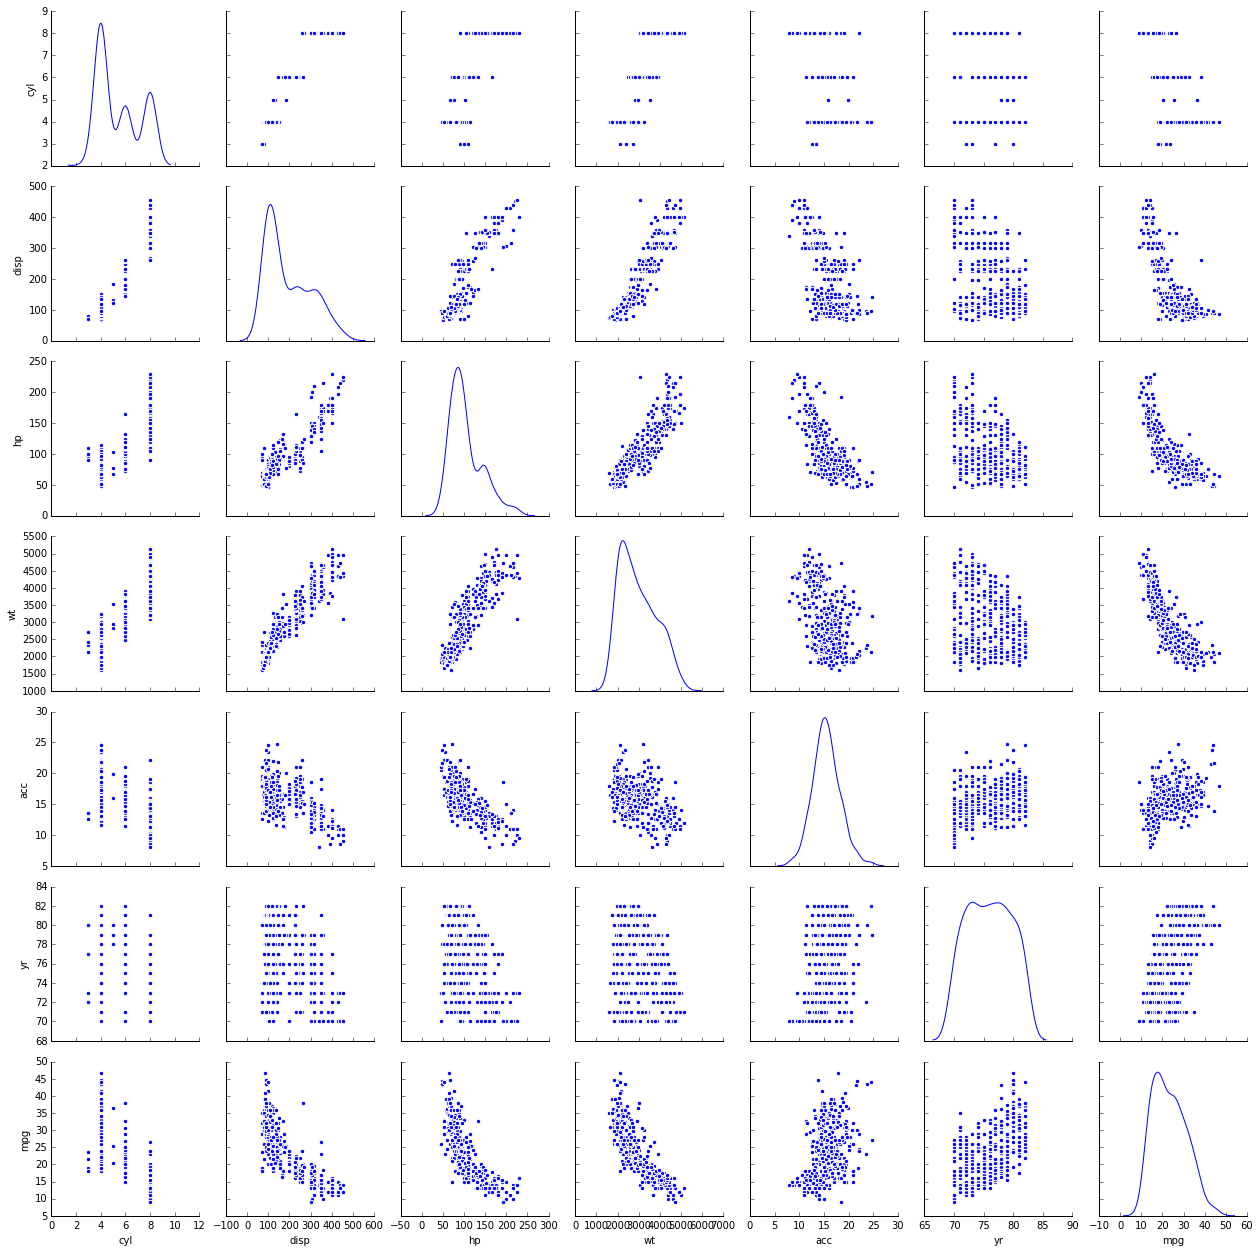

In [21]:
sns.pairplot(df_dropped_na, diag_kind='kde') 

### Observation
> Since cyl has 3 modes, disp 3 modes and hp has 2 modes, teh number of clusters would be around 3 (incase the clusters overlap) to 3 * 3 = 9 clusters (incase the clusters are hidden)

### Standardizing the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
Using zscore function to do this, on the numerical columns

In [62]:
from scipy.stats import zscore
df_numerical_columns = df_dropped_na.drop(['car name'],axis=1)
df_zscored = df_numerical_columns.apply(zscore)
df_zscored.sample(5)

,cyl,disp,hp,wt,acc,yr,mpg
280,0.309967,0.350090,0.273935,0.315230,-0.051292,0.820978,-0.249635
347,-0.864014,-1.046900,-1.026725,-1.181849,1.400433,1.364599,1.738807
36,0.309967,0.531890,-0.428421,0.382422,-0.014999,-1.353505,-0.570352
173,-0.864014,-0.721574,-0.194303,-0.509931,0.529398,-0.266263,0.071081
246,-0.864014,-1.113879,-1.364896,-1.170061,1.400433,0.549168,1.200003


In [63]:
df_zscored.shape

(392, 7)

In [64]:
df_zscored[(df_zscored < -3) | (df_zscored > 3)].any()

cyl     False
disp    False
hp       True
wt      False
acc      True
yr      False
mpg     False
dtype: bool

### Observation
> Clearly there are outliers in the data for multiple columns

In [65]:
df_zscored = df_zscored[(df_zscored > -3) & (df_zscored < 3)].dropna()

In [66]:
df_zscored.shape

(385, 7)

# 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

#### Calculating distortion - C distance

In [67]:
#array to plot the elbow plot
distortion = []

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
cluster_range=range(2,10)               #Cannot iterate over n_clusters = 1 in KMeans 
cluster_sil_scores = []

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [68]:
#Finding optimal no. of clusters
for k in cluster_range:
    clusters=KMeans(n_clusters=k , random_state=1)
    clusters.fit(df_zscored)
    prediction=clusters.predict(df_zscored)
    distortion.append( clusters.inertia_ )
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_sil_scores.append(metrics.silhouette_score(df_zscored, labels, metric='euclidean'))

In [69]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df.head(10)

,num_clusters,distortion,Avg Sil Score
0,2,1204.824514,0.454906
1,3,873.749839,0.357003
2,4,673.618829,0.354160
3,5,606.153798,0.316932
4,6,546.704768,0.278717
5,7,496.835191,0.279842
6,8,452.962095,0.267495
7,9,415.768744,0.268032


### Plotting Elbow/ Scree Plot

In [70]:
# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

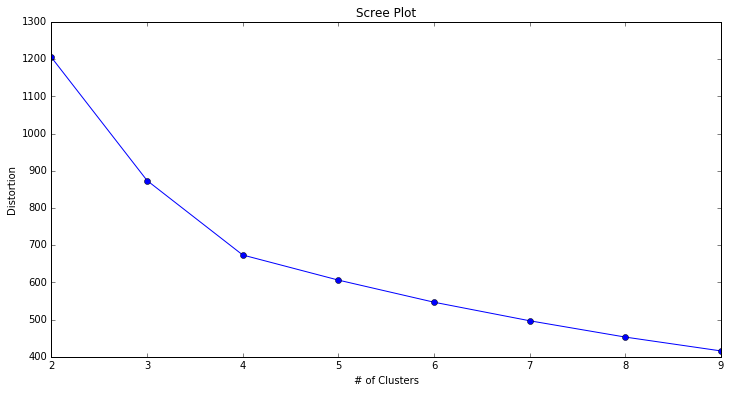

In [71]:
plt.figure(figsize=(12,6))
plt.title('Scree Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

### Find out the optimal value of K

#### Observation
> Choosing value of K as 4, since we can see a higher rate of drop using the Scree plot

In [72]:
clusters=KMeans(n_clusters=4 , random_state=1)
clusters.fit(df_zscored)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [73]:
clusters.cluster_centers_

array([[ 0.40230226,  0.28751848, -0.04845337,  0.32576022,  0.3055226 ,
         0.0391417 , -0.48862314],
       [-0.83140299, -0.79200793, -0.74949159, -0.79099938,  0.32508132,
         1.10537262,  1.19442058],
       [ 1.48394702,  1.43589274,  1.40839908,  1.38317324, -1.01144655,
        -0.63169726, -1.14821171],
       [-0.87000325, -0.8139871 , -0.56061084, -0.76140124,  0.32978598,
        -0.63237525,  0.21193472]])

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [74]:
pd.DataFrame(clusters.cluster_centers_, columns=df_numerical_columns.columns).T

,0,1,2,3
cyl,0.402302,-0.831403,1.483947,-0.870003
disp,0.287518,-0.792008,1.435893,-0.813987
hp,-0.048453,-0.749492,1.408399,-0.560611
wt,0.325760,-0.790999,1.383173,-0.761401
acc,0.305523,0.325081,-1.011447,0.329786
yr,0.039142,1.105373,-0.631697,-0.632375
mpg,-0.488623,1.194421,-1.148212,0.211935


In [78]:
df_zscored['cluster'] = clusters.labels_
df_zscored.sample(5)

,cyl,disp,hp,wt,acc,yr,mpg,cluster
166,1.483947,1.029447,0.638120,0.225641,-1.285258,-0.266263,-1.340071,2
282,-0.864014,-0.520637,-0.428421,-0.103244,0.638278,0.820978,-0.147006,1
373,-0.864014,-0.520637,-0.324369,-0.132715,0.311639,1.636410,0.071081,1
301,-0.864014,-0.855532,-0.896659,-0.916618,-0.849741,0.820978,1.379605,1
10,1.483947,1.804490,1.704660,0.690090,-2.011120,-1.625315,-1.083498,2


In [79]:
df_zscored['cluster'].value_counts()

1    108
3     98
2     90
0     89
Name: cluster, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24e0b400>,
      dtype=object)

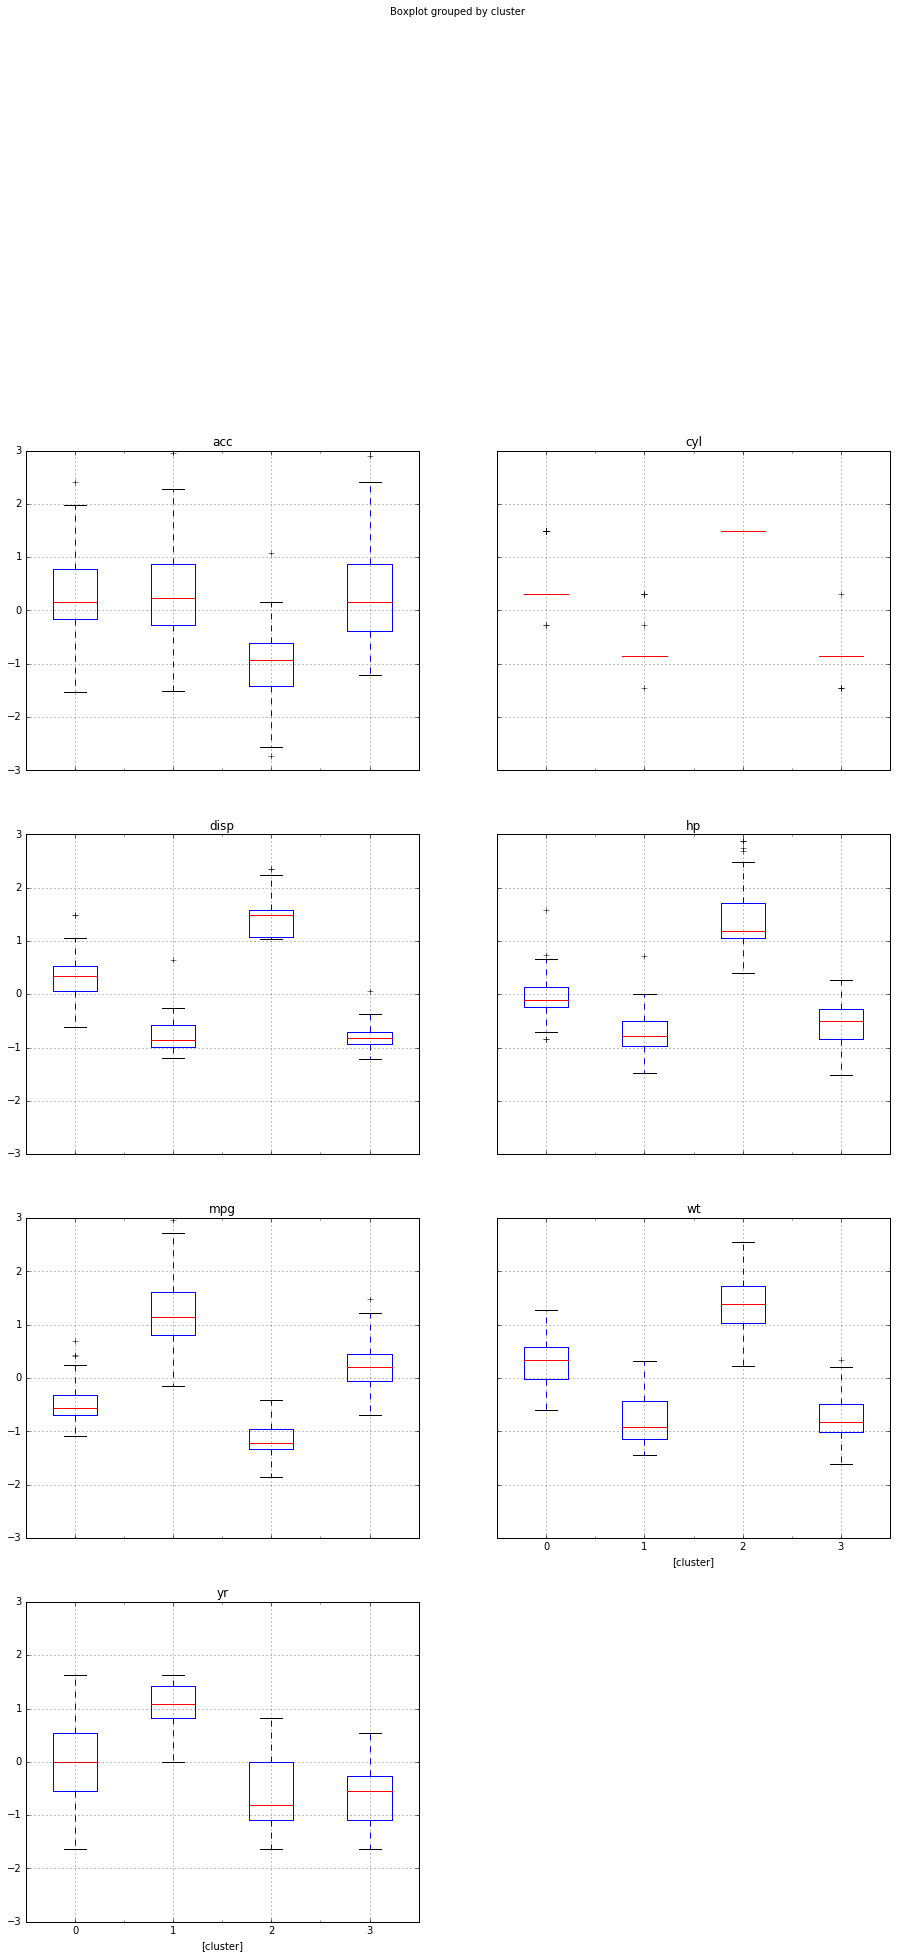

In [80]:
df_zscored.boxplot(by = 'cluster',  layout=(11,2), figsize=(15, 77))

### Observations
- Cluster 1 is the highest mpg cars and relatively lower weight, low hp, cyl and disp
- Cluster 2 is the lowest mpg cars, and highest wt, hp, cyl and disp  
- Cluster 0,3 are lying between clusters 1 and 2, following similar trends as 1 and 2 where 3 is having higher mpg than 0 and correspondingly having lower weight, hp, cyl and disp than 0

# 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [100]:
df_dropped_na.shape

(392, 8)

In [101]:
df_zscored.shape

(385, 8)

In [102]:
# Adding cluster to our original cleaned df
df_dropped_na_with_cluster = df_dropped_na.join(df_zscored['cluster'], on=df_dropped_na.index).dropna()
df_dropped_na_with_cluster.shape

(385, 9)

In [103]:
df_dropped_na_with_cluster.sample(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg,cluster
109,chevrolet vega,4,140.0,72.0,2401,19.5,73,21.0,3.0
216,honda accord cvcc,4,98.0,68.0,2045,18.5,77,31.5,1.0
173,datsun 710,4,119.0,97.0,2545,17.0,75,24.0,3.0
152,plymouth valiant custom,6,225.0,95.0,3264,16.0,75,19.0,0.0
274,audi 5000,5,131.0,103.0,2830,15.9,78,20.3,0.0


In [111]:
df_dropped_na_with_cluster['cluster'].value_counts()

1.0    108
3.0     98
2.0     90
0.0     89
Name: cluster, dtype: int64

In [132]:
cluster_list = df_dropped_na_with_cluster.cluster.unique()
cluster_list

array([2., 3., 0., 1.])

In [147]:
from sklearn.linear_model import LinearRegression

In [146]:
for i in cluster_list:
    print("\n\n\nFor cluster: ",i)
    cluster_df = df_dropped_na_with_cluster[df_dropped_na_with_cluster['cluster'] == i]

    X = cluster_df.drop(['car name','mpg','cluster'], axis=1) #independent variables
    y = cluster_df[['mpg']]    #Dependent Variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
    regression_model = LinearRegression() 
    regression_model.fit(X_train, y_train)
    print("Respective coefs")
    print(pd.DataFrame(regression_model.coef_[0],X_train.columns))
    print("\nModel Intercepts: ", regression_model.intercept_[0])
    print("\nModel Score: ", regression_model.score(X_test, y_test))




For cluster:  2.0
Respective coefs
             0
cyl   0.000000
disp -0.000507
hp   -0.026821
wt   -0.001283
acc  -0.451685
yr    0.375012

Model Intercepts:  2.406949354533083

Model Score:  0.2716182017186526



For cluster:  3.0
Respective coefs
             0
cyl   4.053545
disp -0.052900
hp   -0.058494
wt   -0.004233
acc  -0.312367
yr    0.372775

Model Intercepts:  7.120944624709654

Model Score:  0.5603202856066967



For cluster:  0.0
Respective coefs
             0
cyl   1.011188
disp  0.001387
hp   -0.019800
wt   -0.003927
acc   0.018813
yr    0.484986

Model Intercepts:  -9.317646060629773

Model Score:  0.4200053158813335



For cluster:  1.0
Respective coefs
             0
cyl   3.690330
disp  0.005474
hp   -0.138574
wt   -0.007863
acc   0.115122
yr    0.850699

Model Intercepts:  -23.965912475697117

Model Score:  -0.078362511336034


In [152]:
print("\n\nWithout using clustering we are getting better model score\n")
X = df_dropped_na_with_cluster.drop(['car name','mpg','cluster'], axis=1) #independent variables
y = df_dropped_na_with_cluster[['mpg']]    #Dependent Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
regression_model = LinearRegression() 
regression_model.fit(X_train, y_train)
print("Respective coefs")
print(pd.DataFrame(regression_model.coef_[0],X_train.columns))
print("\nModel Intercepts: ", regression_model.intercept_[0])
print("\nModel Score: ", regression_model.score(X_test, y_test))



Without using clustering we are getting better model score

Respective coefs
             0
cyl   0.110173
disp -0.002801
hp   -0.010199
wt   -0.006317
acc  -0.038168
yr    0.740431

Model Intercepts:  -12.371857572003734

Model Score:  0.8035868051998841
